<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/python-logo.png" style="height: 100px;" align=right>

# Sampling

Descriptive Statistics

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 

In [2]:
import platform

sns.__version__ >= "0.9.0"
pd.__version__ >= "0.23.4"
np.__version__ >= "1.15.4"
platform.python_version() >= "3.6"

True

# Content Outline
1. [**Introduction**](#intro)
    * [Motivation](#motivation)
    * [Populations](#populations): Sub-populations
    * [Samples](#samples): Homogenous and Heterogeneous Samples
    * [Sampling Frames and Sampling Units](#frames)


2. [**Sampling Methodologies**](#methods)
    * [Probabilistic Sampling](#prob): Simple Random Sampling, Stratified Sampling, Cluster Sampling, Systematic Sampling, Multistage Sampling
    * [Non-probabilistic Sampling](#noprob): Convenience Sampling, Volunteer Sampling


3. [**The Effect of Sample Size on Bias**](#effect)
    * [Determining the Minimum Number of Voters to Sample](#power)


4. [**Summary**](#summary)

In [3]:
import random
random.seed(42)

# 1. Introduction <a name="intro"></a>

## Motivation <a name="motivation"></a>

![](../images/voter.png)

In a state of approximately 60,000 residents there are two candidates running for the post of Member of Parliament (MP) - Candidate A and Candidate B. A political analyst would like to determine whether the voting residents favor one candidate over the other. To accomplish this, he decides to run a poll for all voting residents of the state.

Based on the above scenario, take a minute to give your thoughts on the following:
1. Would it be possible to poll every single voting resident of the state? 
2. What would be the cost of such an exercise?
3. Can we employ some strategy to obtain a reasonably similar result without expending as much resources?

Thankfully we can save quite a bit of time (and money!) by polling only a portion of the voters and with the magic of statistics, make reasonable inferences about the voting preferences of all voters in the state. This process is called **sampling**.

## Populations
Before we dive deep into the process of sampling, let's first take a look at some preliminary concepts to start ourselves off on solid ground. In our motivational example above, the object of our interest is the voting preferences of the state's 60,000 residents, i.e. we are interested in knowing the vote of *all* voting residents in the town. In statistical terms, the set of all these voting residents is called a **population**. Simply put, a population is the set that contains **all** elements of interest for a particular study, and it exists to ensure that we don't draw observations from data unrelated to the problem at hand.

The definition of what constitutes a population is highly dependent on the context of the study, and to this extent a little bit of domain knowledge goes a long way.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. A researcher wishes to study the effect of steroid use in the National Football League (NFL). The population defined here would be the set of all active professional players in the NFL.
<p>
2. A grocery store owner would like to identify the most popular cereal he has on sale. The population defined here would be the set of all cereal products he currently sells at the store.
<p>
3. The Human Resource Department at KFRU, a large radio station, is interested in evaluating the effect of internal training programs on their staff. The population defined here would be the set of all current employees in the company.
</div>

In each of the above cases, the elements of interest are either people (NFL players, employees) or products (cereals) are said to be **members** of the population.

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
A. Suppose that you want to determine the movie preferences of students at a given university. Who/what are the members in your population?
<p>
B. Suppose that you would like to study the job satisfaction of teachers in international schools in KL. Who/what are the members in your population?
<p>
</div>

### Sub-populations

In many cases, a population can be divided into smaller groups called **sub-populations**, allowing us to narrow down our point of interest. For example, the population of all employees in a given company can be further split into all *male* employees in the company and all *female* employees in the company. Sub-populations can be defined by any chosen characteristic, but the division must obey two rules:
1. A member of one group cannot belong to another group. (**mutually exclusive**)
2. Each member in the population belongs to a group. (**collectively exhaustive**)

![](../images/subpopulations2.png)

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Recall the Human Resource Department at KFRU from our previous example. We can sub-divide the population of all employees to the <i>employees from each department</i>.
</div>

There is no restriction on the number of sub-populations (as how we define a sub-population is subject to domain knowledge), and we can even go further to sub-divide the sub-populations itself!

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
We can divide the employees in the Human Resource Department into <i>male</i> and <i>female</i> employees of the department.
</div>

Now, you may be wondering - do I really need to take every single sub-population into account?

Well, the answer is **no**. Sub-populations can safely be **ignored** if they aren't *perceived to have an impact* on the *object of interest* in our study.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
We wish to study the average income of a fresh graduate in KL but we are <i>not interested</i> in knowing if there is a significant difference in income between male and female fresh graduates. In such a case, we ignore the sub-populations of male and female fresh graduates and treat them as one whole set.
</div>

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
The <code>voter</code> data set for the state in our motivational example has been pre-loaded and summarized for you below. Examine the output and discuss how we can construct various sub-populations from the data.
</div>

In [4]:
dtype = {'state_seat': str, 
         'polling_district': str, 
         'postcode': str}
voter = pd.read_csv('../data/voter.csv', dtype = dtype, 
                    usecols = np.arange(1, 7))

In [5]:
voter.head()

,gender,ic,state_seat,polling_district,ethnicity,postcode
0,Male,661123-06-4031,3,44,Bumiputera,17750
1,Female,871217-06-8098,3,41,Bumiputera,17710
2,Male,761213-33-3923,2,29,Bumiputera,17500
3,Male,610407-33-9219,1,7,Bumiputera,17180
4,Male,600920-06-5171,2,23,Bumiputera,17440


In [6]:
voter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51998 entries, 0 to 51997
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            51998 non-null  object
 1   ic                51998 non-null  object
 2   state_seat        51998 non-null  object
 3   polling_district  51998 non-null  object
 4   ethnicity         51998 non-null  object
 5   postcode          51998 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [7]:
voter.describe()

,gender,ic,state_seat,polling_district,ethnicity,postcode
count,51998,51998,51998,51998,51998,51998
unique,2,51998,3,46,4,52
top,Female,881008-32-5775,3,28,Bumiputera,17470
freq,26232,1,20182,1662,36318,1594


<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
The KFRU <code>HR</code> data set has been pre-loaded and summarized for you below. Examine the head of the DataFrame and discuss how we can construct various sub-populations from the data.
</div>

In [8]:
dtype = {'Employee.Number': str, 
         'Zip': str }
hr = pd.read_csv('../data/hr.csv', dtype = dtype, parse_dates = [5, 12, 13])
hr.head().T

,0,1,2,3,4
EmployeeName,"Brown, Mia","LaRotonda, William","Steans, Tyrone","Howard, Estelle","Singh, Nan"
EmployeeNumber,1103024456,1106026572,1302053333,1211050782,1307059817
State,MA,MA,MA,MA,MA
Zip,1450,1460,2703,2170,2330
DOB,11/24/1985,4/26/1984,09/01/1986,9/16/1985,5/19/1988
Age,32,33,31,32,29
Sex,Female,Male,Male,Female,Female
MaritalDesc,Married,Divorced,Single,Married,Single
CitizenDesc,US Citizen,US Citizen,US Citizen,US Citizen,US Citizen
HispanicLatino,No,No,No,No,No


In [9]:
# MC
# Type your answer here.
# Specify the data types to examine the categorical variables only.

hr.describe(include='object').T

,count,unique,top,freq
EmployeeName,301,301,"Wallace, Courtney E",1
State,301,28,MA,266
Zip,301,157,1886,12
DOB,301,298,09/09/1965,2
Age,301,39,31,22
Sex,301,2,Female,174
MaritalDesc,301,5,Single,127
CitizenDesc,301,3,US Citizen,285
HispanicLatino,301,4,No,271
RaceDesc,301,6,White,190


In [ ]:
# MC
# What attributes can be used to form sub-populations?

# There are 11 attributes that can be used to form sub-populations:
# 1. Zip
# 2. Age
# 3. Sex
# 4. Marital Status
# 5. Citizenship Status
# 6. Racial Descent
# 7. Employment Status
# 8. Department
# 9. Position
# 10. Employee Source
# 11. Performance Score

## Samples
As indicated in the beginning of this course, surveying an entire population can be a costly affair, and in most cases it is impossible to collate data from every single member of a population. By selecting/drawing a subset of the population, we obtain a **sample**, which can be used to estimate the properties of the population it is drawn from. We can draw as many samples as we want from a population, and we can even dictate the **size** of the samples, i.e. the *number of members in the sample*.

![](../images/pop_spl.png)

To avoid confusion, we commonly denote the size of a sample by $n$, and the size of a population by $N$. Sample sizes are restricted to the range $1 \leq n \leq N$ as selecting none of the members yields nothing, and we cannot select more members than there are in the population. In the case of the diagram above, we have a population of size $N=18$, with two samples of size $n_1=3$ and $n_2=2$ respectively.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Recall the example where we wished to study the average income of a fresh graduate in KL. Suppose that there are a total of N = 20,000 fresh graduates working in the city. To <i>draw</i> a sample of size n = 100, we would <b>select</b> 100 fresh graduates from this group of 20,000 to inquire about their income.
</div>

Samples can be drawn in **two** ways - *with* or *without* replacement. To illustrate the differences between these techniques, consider the following scenario:

Three colored balls are available to be drawn from a box - one blue, one orange, and one green. We would like to draw a sample of 2 balls and record the colors. The acts of drawing a ball are defined as follows:

**Drawing *with* replacement:** A ball is drawn and its color is recorded. The ball is then put back in the box before the second draw to be made.

**Drawing *without* replacement:** A ball is drawn and its color is recorded. The ball is **not** put back in the box before the second draw to be made.

The diagram below gives the odds of obtaining a ball of a specific color for the first and second draw.

![](../images/replacement.png)

Note that on the first draw, both techniques have the same odds - 1 in 3 of obtaining a ball in each color. However, this no longer the case once the second ball is drawn. If the first ball drawn was not placed back in the box before the second draw, the odds of obtaining a ball of a different color than the first has now gone up to 1 in 2!

Sampling of real-world data is generally done **without replacement**. Sampling with replacement on the other hand is used in *oversampling* techniques, which are commonly employed in machine learning (and beyond the scope of this course).

### Homogenous and Heterogeneous Samples

Samples are classified as **homogeneous** or **heterogenous** based on the members they contain, with the former having all members drawn from the *same sub-population* and the latter having members drawn from *multiple sub-populations*. The diagram below illustrates the difference between homogeneous and hetereogeneous samples:

![](../images/hom_het_sam.png)

Here we have a population that can be broken into two sub-populations. Samples that contain only members of *one* sub-population are deemed homogenous, and samples that contain members of *both* sub-populations are deemed heterogeneous.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose our population is defined as "All employees in KFRU."
<p>
<b>Homogeneous sample:</b>
<p>
A sample of size $n = 25$ where all sample members are from IT.
<p>
<b>Heterogeneous sample:</b>
<p>
A sample of size $n = 25$, where 13 sample members are from IT, 2 are from Production, and the remainder are from Sales.
</div>

In the interest of ensuring that our samples accurately reflect the demographic proportions of the population, we often strive to draw samples with the same ratio of members across the various types to that of the population. As you can very well guess, obtaining an exact ratio isn't always possible if you fix the sample size so for cases such as these we favor sampling a **proportion** of the population.

![](../images/rep_sam.png)

In the above illustration, the population has a $1:1:1$ ratio between its 3 sub-populations. Taking a sample with the same ratio of members to that of the sub-population ratio results in what we call a **representative sample**. Conversely, if a sample is not representative we say it is **biased**. Numerical measures such as *mean* and *variance* for a biased sample do not accurately reflect that of the population and if used for business decision making can potentially lead to disastrous results.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
In a company there are 3 senior, 6 mid-level, and 9 junior employees.
<p>
<b>Representative sample:</b> A sample of size $n = 6$ consisting of 1 senior, 2 mid-level, and 3 junior employees. This amounts to sampling $30\%$ of the population.
<p>
<b>Biased sample:</b> A sample of size $n = 6$ consisting of 3 senior and 3 mid-level employees.
</div>

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
    Using the <code>voter</code> data set, draw the following sample:
<p>
    A sample of 200 voters (without replacement) from <code>polling_district</code> 16. Assign this to the variable <code>mysample1</code> and examine the resulting sample using the <code>describe</code> method.
</div>

In [22]:
np.random.seed(42)

mysample1 = voter.loc[voter.polling_district == "16",].sample(n = 200, replace = False)

In [23]:
mysample1.describe()

,gender,ic,state_seat,polling_district,ethnicity,postcode
count,200,200,200,200,200,200
unique,2,200,1,1,4,3
top,Female,760811-33-1644,1,16,Bumiputera,17250
freq,107,1,200,200,139,72


In [24]:
voter.describe()

,gender,ic,state_seat,polling_district,ethnicity,postcode
count,51998,51998,51998,51998,51998,51998
unique,2,51998,3,46,4,52
top,Female,881008-32-5775,3,28,Bumiputera,17470
freq,26232,1,20182,1662,36318,1594


In [25]:
mysample1.gender.value_counts(normalize=True)/voter.gender.value_counts(normalize=True)

Female    1.060496
Male      0.938410
Name: gender, dtype: float64

In [26]:
mysample1.ethnicity.value_counts(normalize=True)/voter.ethnicity.value_counts(normalize=True)

Bumiputera    0.995061
Cina          1.380827
India         0.738189
Lain-lain     0.913136
Name: ethnicity, dtype: float64

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
    Using the <code>hr</code> data set, draw the following sample:
<p>
A sample of 20 employees (without replacement) from the <code>IT/IS</code> department. Assign this to a variable of your choice and examine if the resulting sample is representative using <code>describe</code>.
</div>

In [27]:
hr.Department.unique()

array(['Admin Offices', 'Executive Office', 'IT/IS', 'Production       ',
       'Sales', 'Software Engineering'], dtype=object)

In [28]:
# MC
# Type your answer here.
np.random.seed(42)
hr_it_sample = hr.loc[hr.Department == "IT/IS",:].sample(n = 20, replace = False)
hr_it_sample

,EmployeeName,EmployeeNumber,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,HispanicLatino,...,DateOfHire,DateOfTermination,ReasonForTermination,EmploymentStatus,Department,Position,PayRate,ManagerName,EmployeeSource,PerformanceScore
35,"Cisco, Anthony",1102024173,MA,2135,11/24/1989,28,Male,Married,US Citizen,Yes,...,3/30/2015,NaT,N/A - still employed,Active,IT/IS,Network Engineer,42.00,Peter Monroe,Information Session,N/A- too early to review
24,"Zhou, Julia",1110029732,MA,2148,2/24/1979,38,Female,Single,US Citizen,No,...,3/30/2015,NaT,N/A - still employed,Active,IT/IS,Database Administrator,31.40,Simon Roup,Employee Referral,90-day meets
19,"Petrowsky, Thelma",1108027853,MA,1886,9/16/1984,33,Female,Married,US Citizen,No,...,11/10/2014,NaT,N/A - still employed,Active,IT/IS,Database Administrator,42.75,Simon Roup,Employee Referral,Exceptional
36,"Dolan, Linda",1101023540,MA,2119,7/18/1988,29,Female,Married,US Citizen,No,...,01/05/2015,NaT,N/A - still employed,Active,IT/IS,Network Engineer,37.00,Peter Monroe,Employee Referral,90-day meets
15,"Horton, Jayne",1105025718,MA,2493,2/21/1984,33,Female,Single,US Citizen,No,...,3/30/2015,NaT,N/A - still employed,Active,IT/IS,Database Administrator,34.00,Simon Roup,Glassdoor,N/A- too early to review
51,"Warfield, Sarah",1301052347,MA,2453,05/02/1978,39,Female,widowed,US Citizen,No,...,3/30/2015,NaT,N/A - still employed,Active,IT/IS,Sr. Network Engineer,55.20,Peter Monroe,Employee Referral,N/A- too early to review
30,"Clayton, Rick",1301052902,MA,2170,09/05/1985,32,Male,Single,US Citizen,No,...,09/05/2012,NaT,N/A - still employed,Active,IT/IS,IT Support,28.99,Eric Dougall,Glassdoor,Fully Meets
50,"South, Joe",1308060959,CT,6278,09/09/1965,52,Male,Single,US Citizen,No,...,11/10/2014,NaT,N/A - still employed,Active,IT/IS,Sr. Network Engineer,53.00,Peter Monroe,Employee Referral,90-day meets
40,"Shepard, Anita",906014183,MA,1773,4/14/1981,36,Female,Married,US Citizen,No,...,9/30/2014,NaT,N/A - still employed,Active,IT/IS,Network Engineer,47.00,Peter Monroe,Vendor Referral,Fully Meets
17,"Murray, Thomas",1406068403,TX,78230,07/04/1988,29,Male,Divorced,US Citizen,No,...,11/10/2014,NaT,N/A - still employed,Active,IT/IS,Database Administrator,35.50,Simon Roup,Diversity Job Fair,Exceptional


In [29]:
# MC
# Type your answer here.

hr.describe(include="object").T

,count,unique,top,freq
EmployeeName,301,301,"Wallace, Courtney E",1
State,301,28,MA,266
Zip,301,157,1886,12
DOB,301,298,09/09/1965,2
Age,301,39,31,22
Sex,301,2,Female,174
MaritalDesc,301,5,Single,127
CitizenDesc,301,3,US Citizen,285
HispanicLatino,301,4,No,271
RaceDesc,301,6,White,190


In [30]:
hr_it_sample.describe(include="object").T

,count,unique,top,freq
EmployeeName,20,20,"Favis, Donald",1
State,20,3,MA,17
Zip,20,18,2148,2
DOB,20,20,07/04/1988,1
Age,20,14,36,3
Sex,20,2,Male,10
MaritalDesc,20,5,Single,8
CitizenDesc,20,2,US Citizen,19
HispanicLatino,20,2,No,15
RaceDesc,20,5,White,14


In [31]:
hr_it_sample.MaritalDesc.value_counts(normalize=True)

Single       0.40
Married      0.40
Divorced     0.10
widowed      0.05
Separated    0.05
Name: MaritalDesc, dtype: float64

In [32]:
hr.MaritalDesc.value_counts(normalize=True)

Single       0.421927
Married      0.395349
Divorced     0.099668
Separated    0.046512
widowed      0.036545
Name: MaritalDesc, dtype: float64

In [33]:
hr.Sex.value_counts(normalize=True)

Female    0.578073
Male      0.421927
Name: Sex, dtype: float64

In [34]:
hr_it_sample.Sex.value_counts(normalize=True)

Male      0.5
Female    0.5
Name: Sex, dtype: float64

## Sampling Frames and Sampling Units
As we saw in the section on populations, a population needs to be defined such that it covers the entirety of data that is of interest in a given study. This raises the question of *how* we can identify each individual member of our population to facilitate drawing samples. To this extent, we would like to define a **sampling frame**, i.e. a *list* of all the members in the population for us to sample from. We will use this sampling frame as a basis to draw samples using one or more prescribed methods (sampling methodologies) to ensure consistency.

As you can very well deduce, it may not always be possible to get an entire list of the members in a population. In cases such as these, we strive to define a sampling frame that is **as close as possible** to the population in order to **minimize** bias. Looking back at our motivational example, the sampling frame here would be the *roster of registered voters* in the state!

![](../images/sampling_frame2.png)

The table below summarizes the concept of how we would draw samples from a population using a sampling frame:

| Component      | Example                                                               |
|:--------------:|:---------------------------------------------------------------------:|
| Population     | A company's entire customer base                                      |
| Sampling Frame | Those customers the company has access to (contact details available) |
| Samples        | Customers who you contact and actually respond to your survey         |

In addition to a sampling frame, we also wish to define the number of members we select at a single time when we draw our samples. This selection size is called the **sampling unit**. Sampling units come in handy when we wish to widen/narrow our scope without altering our entire sampling methodology.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. Recall the example where we wished to study the average income of a fresh graduate in KL. As we expect the income to vary between individuals, we would select the sampling unit here as <i>one person</i>.
<p>
2. Suppose we want to study the average household income across a country instead. Since we are not interested in the individual incomes of each family member, we can widen the sampling unit to <i>one household</i>.
</div>

# 2. Sampling Methodologies <a name="methods"></a>
There are a variety of *techniques* (methods) in which sampling can be carried out, each with its own strengths and weaknesses. These techniques can generally be broken down into two major categories - **probabilistic** and **non-probabilistic sampling**.

## Probabilistic Sampling <a name="prob"></a>
Probabilistic sampling is a sampling technique in which the *likelihood* that a member of the population is selected as part of a sample is **known** (or can be calculated). There are **5** sampling techniques that fall under the umbrella of probabilistic sampling, namely:
1. Simple Random Sampling
2. Stratified Sampling
3. Cluster Sampling
4. Systematic Sampling
5. Multistage Sampling

To avoid confusion (and a ton of mathematical jargon), we will focus on the process of each sampling technique and skip the calculation of probabilities etc.

### Simple Random Sampling
In simple random sampling, each member of the population is **equally likely** to be selected as part of the sample. This can be done by **randomly selecting** members from the population.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
Suppose we wish to study the the job satisfaction of teachers in international schools in KL. We would first need to obtain a sampling frame, i.e. compile a list of all teachers in international schools and their contact details. We would then randomly choose names on this list to contact for interviewing.
</div>

<div class = "alert alert-block alert-success">
<p>
<b>Pros</b>
<p>
1. Samples can easily be drawn with the assistance of statistical software suites.
<p>
2. Selection bias is minimal as the process of drawing members of the population is random.
<p>
<b>Cons</b>
<p>
1. Requires a well-defined sampling frame, which in practice may not always be available.
<p>
2. May not yield a representative sample as there is no stipulation on the ratio of members drawn.
</div>

<div class = "alert alert-block alert-warning">
<p>
<b>Guided Exercise</b>
<p>
    Draw a simple random sample of 2,500 voters from the <code>voter</code> data set. Assign this to the variable <code>mysample2</code> and use bar graphs to examine the demographics of the resulting sample with respect to <code>gender</code>, <code>ethnicity</code>, and <code>state_seat</code>.
</div>

In [38]:
np.random.seed(42)
mysample2 = voter.sample(n = 2500, replace = False)

In [46]:
def compare_pop_sample(pop_df, sample_df, col): 
    pop = pop_df[col].value_counts(normalize = True)
    sample = sample_df[col].value_counts(normalize = True)
    pop_sample = pd.concat([pop, sample], 
                           axis = 0, 
                           keys = ["pop", "sample"]).reset_index()
    sns.catplot(x = "level_1", y = col, 
                hue = "level_0", kind = "bar", 
                data = pop_sample)

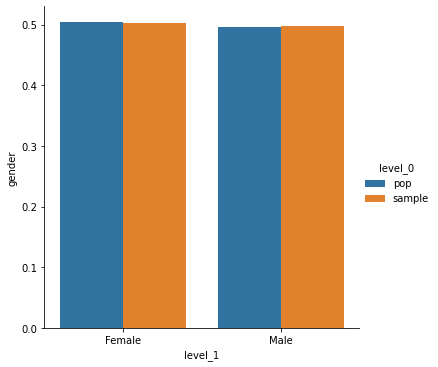

In [47]:
compare_pop_sample(voter, mysample2, "gender")

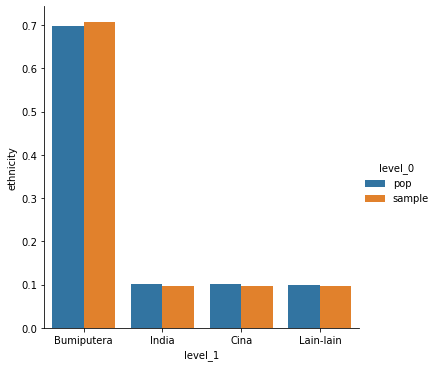

In [48]:
compare_pop_sample(voter, mysample2, "ethnicity")

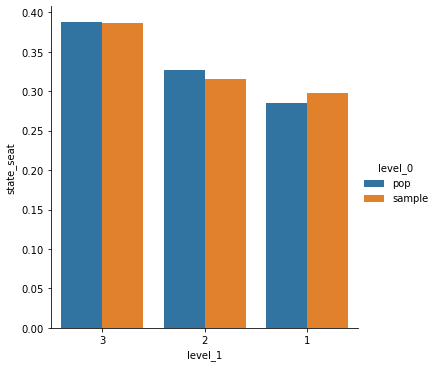

In [49]:
compare_pop_sample(voter, mysample2, "state_seat")

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
Draw a simple random sample of 200 employees from the <code>hr</code> data set. Assign this to a variable of your choice and use bar graphs to examine the demographics of the resulting sample with respect to <code>MaritalDesc</code> and <code>Department</code>.
</div>

In [50]:
# MC
# Type your answer here.
np.random.seed(42)
hr_sample = hr.sample(n = 200, replace = False)

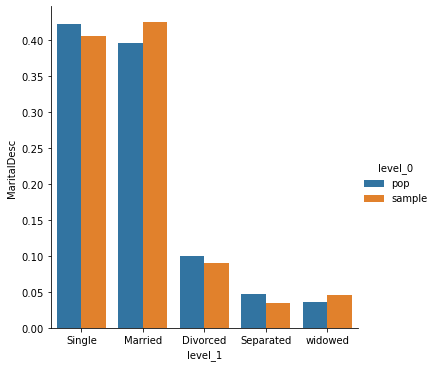

In [51]:
# MC
# Type your answer here.

compare_pop_sample(hr, hr_sample, "MaritalDesc")

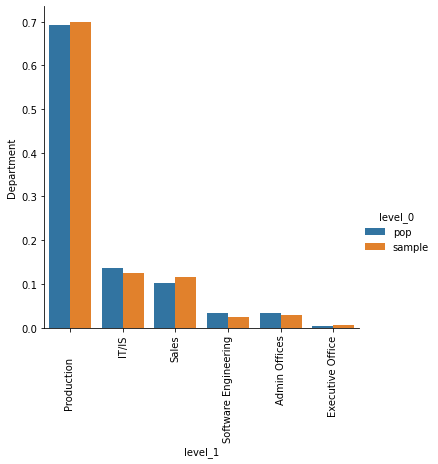

In [53]:
# MC
# Type your answer here.
import matplotlib.pyplot as plt
compare_pop_sample(hr, hr_sample, "Department")
plt.xticks(rotation=90);

### Stratified Sampling
Stratified sampling is a sampling approach that is aimed at minimizing *representation bias*. It invovles grouping members of the population by their sub-populations and drawing samples from each one to preserve the ratio/balance from each group. For each sub-population $k$, we draw a fixed percentage of $N_k$ members to make up the sample.

<img src='../images/Startified_Sampling.png'>

Note that here we do not fix the sample size unlike simple random sampling. Instead, we specify a percentage of the population to allow for easier computation of how many members to draw from each sub-population.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
Recall the previous example where we wanted to study the the job satisfaction of teachers in international schools in KL. Suppose that we wanted to interview 30% of all teachers. We would then group the teachers by school and randomly select 30% from each school to make up our sample.
</div>

Stratified sampling is useful when we want to ensure that all the various sub-populations are well-represented. National census data is often collected in such a manner to ensure that minority groups etc. are taken into account when federal policies are developed.

<div class = "alert alert-block alert-success">
<p>
<b>Pros</b>
<p>
1. Samples can easily be drawn from each sub-population with the assistance of statistical software suites.
<p>
2. Representation bias is minimal as stratification takes into account the ratio of sub-populations.
<p>
<b>Cons</b>
<p>
1. Requires a well-defined sampling frame, which in practice may not always be available.
<p>
2. If the variance within each sub-population is significantly different, stratified sampling may result in the sample variance being skewed.
<p>
3. If data collection involves travel to various geographical locations, stratification may incur greater cost as each sub-population needs to be accounted for.
</div>

<div class = "alert alert-block alert-warning">
<p>
<b>Guided Exercise</b>
<p>
    Draw a sample of 10% of voters from the <code>voter</code> data set, stratified by <code>gender</code>. Assign this to the variable <code>mysample3</code> and examine the resulting sample using <code>describe</code>.
</div>

In [54]:
mysample3 = voter.groupby('gender').\
apply(lambda x: x.sample(frac = .1, random_state = 42, replace=False))

In [55]:
mysample3

gender              ic state_seat polling_district   ethnicity  \
gender                                                                         
Female 23708  Female  890125-06-7372          1                1  Bumiputera   
       9189   Female  951014-33-6924          2               25  Bumiputera   
       28140  Female  620806-33-9172          2               30  Bumiputera   
       33113  Female  770918-32-2506          2               24  Bumiputera   
       47753  Female  720414-32-1372          1               11        Cina   
...              ...             ...        ...              ...         ...   
Male   24306    Male  420904-06-8661          3               42  Bumiputera   
       49801    Male  900520-06-8407          3               42  Bumiputera   
       33507    Male  760825-32-6785          1                8  Bumiputera   
       13185    Male  860605-06-8005          3               42       India   
       2811     Male  930806-06-3567          3               42  Bumiputera   

             postcode  
gender                 
Female 23708    17110  
       9189     17460  
       28140    17500  
       33113    17440  
       47753    17200  
...               ...  
Male   24306    17730  
       49801    17730  
       33507    17180  
       13185    17710  
       2811     17730  

[5200 rows x 6 columns]

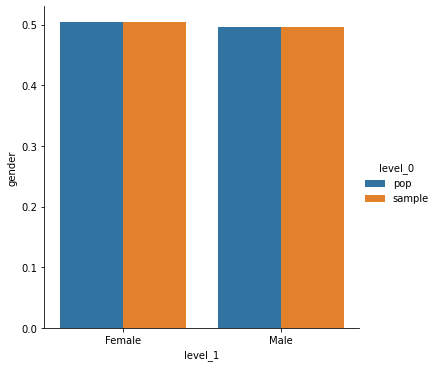

In [56]:
compare_pop_sample(voter, mysample3, "gender")

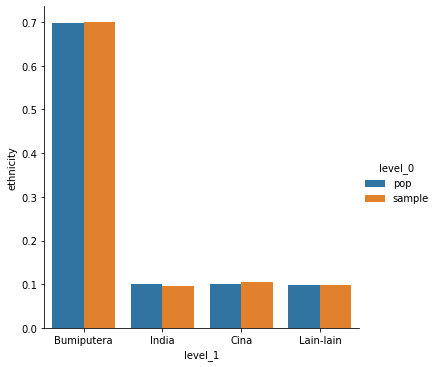

In [57]:
compare_pop_sample(voter, mysample3, "ethnicity")

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
    Draw a sample of 20% of employees from the <code>hr</code> data set, stratified by <code>Sex</code>. Assign this to a variable of your choice and examine the resulting sample using <code>describe()</code>.
</div>

In [58]:
# MC
# Type your answer here.

hr_stratified_sample = hr.groupby('Sex').\
apply(lambda x: x.sample(frac = .2, random_state=42, replace = False))

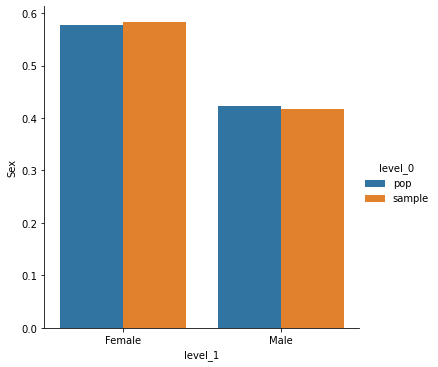

In [59]:
# MC
# Type your answer here.

compare_pop_sample(hr, hr_stratified_sample, "Sex")

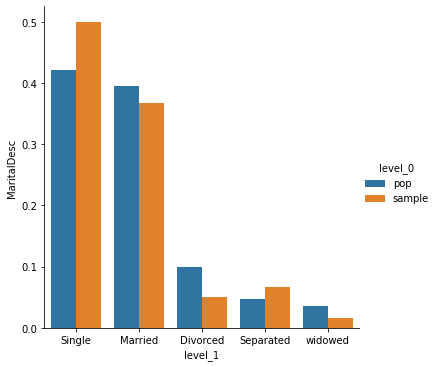

In [60]:
compare_pop_sample(hr, hr_stratified_sample, "MaritalDesc")

### Cluster Sampling
Cluster sampling is similar to stratified sampling in the sense that the sampling is done over sub-populations. The main difference however, is that instead of randomly sampling **within** each sub-population with the intention of preserving proportionality, we **randomly select** a **chosen number** of sub-populations and then proceed to sample from the selected sub-populations. If *all* elements in a chosen cluster are sampled, we call the process **one-stage cluster sampling**.

<img src='../images/Cluster_Sampling.png'>

In the diagram above, we see that 3 random sub-populations (clusters) were chosen from the 7 that exist in the population. Though the number of clusters chosen is entirely up to the researcher, they are commonly dictated by resource availability (cost, manpower, etc.)

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
Recall the previous example where we wanted to study the the job satisfaction of teachers in international schools in KL. To apply one-stage cluster sampling here, we would randomly select a number of international schools within KL (e.g. 20) and interview <i>all</i> teachers at these schools.
</div>

Cluster sampling is better suited towards large populations where sampling within clusters is easily done, but sampling **across** clusters is difficult. Geographical factors such as distance are often used as a measure of when cluster sampling is required.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
To ascertain a specific opinion from all Malaysians within Peninsula Malaysia, it is easier to divide the peninsula into its various states and perform cluster sampling, i.e. sampling only randomly selected states to cut down on traveling costs.
</div>

<div class = "alert alert-block alert-success">
<p>
<b>Pros</b>
<p>
1. Clusters can easily be selected with the assistance of statistical software suites and/or random number generators.
<p>
2. Works well for large large populations.
<p>
<b>Cons</b>
<p>
1. Requires more than 2 sub-populations to be effective. Sampling from only 1 out of 2 sub-populations is biased.
<p>
2. Less control over sample size, poses a problem for populations where the number of members in each sub-population is not equal/similar.
</div>

<div class = "alert alert-block alert-warning">
<p>
<b>Guided Exercise</b>
<p>
    
Draw a one-stage cluster sample from the <code>voter</code> data set, clustered by <code>state_seat</code> by setting the number of clusters to `2` and using simple random sampling of clusters (`np.random.choice`). Assign this to the variable <code>mysample4</code> and examine the resulting sample using <code>describe</code>.
</div>

In [61]:
voter.state_seat.unique()

array(['3', '2', '1'], dtype=object)

In [62]:
# choose clusters with np.random.choice
np.random.seed(42)
clusters = np.random.choice(voter.state_seat.unique(), 
                            size = 2, 
                            replace = False)

clusters

array(['3', '2'], dtype=object)

In [63]:
#mysample4 = voter.loc[cluster_mask, :]
mysample4 = voter[voter.state_seat.isin(clusters)]
mysample4.head()

,gender,ic,state_seat,polling_district,ethnicity,postcode
0,Male,661123-06-4031,3,44,Bumiputera,17750
1,Female,871217-06-8098,3,41,Bumiputera,17710
2,Male,761213-33-3923,2,29,Bumiputera,17500
4,Male,600920-06-5171,2,23,Bumiputera,17440
5,Female,650324-06-1382,3,37,Bumiputera,17660


In [64]:
len(mysample4)

37178

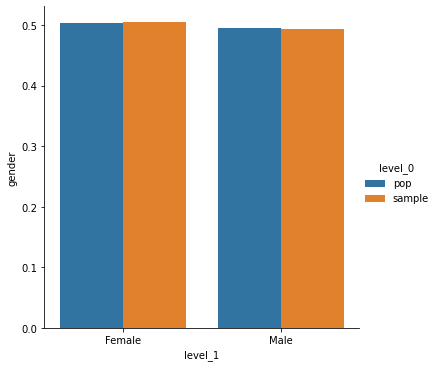

In [65]:
compare_pop_sample(voter, mysample4, 'gender')

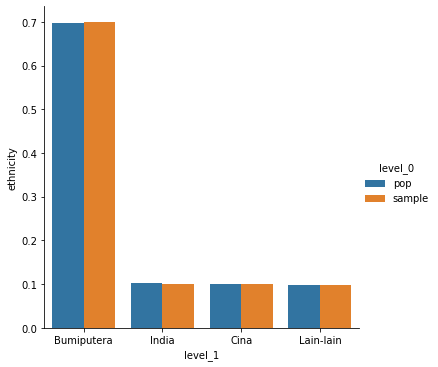

In [66]:
compare_pop_sample(voter, mysample4, 'ethnicity')

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
Draw a one-stage cluster sample from the <code>hr</code> data set, clustered by <code>Department</code> by setting the number of clusters to <code>4</code> and using simple random sampling of clusters. Assign this to a variable of your choice and examine the resulting sample using <code>describe</code>.
</div>

In [67]:
# MC
# Type your answer here.
np.random.seed(42)
clusters = np.random.choice(hr.Department.unique(), size = 4, replace = False)
hr_cluster_sample = hr[hr.Department.isin(clusters)]
hr_cluster_sample

,EmployeeName,EmployeeNumber,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,HispanicLatino,...,DateOfHire,DateOfTermination,ReasonForTermination,EmploymentStatus,Department,Position,PayRate,ManagerName,EmployeeSource,PerformanceScore
0,"Brown, Mia",1103024456,MA,1450,11/24/1985,32,Female,Married,US Citizen,No,...,10/27/2008,NaT,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,MA,1460,4/26/1984,33,Male,Divorced,US Citizen,No,...,01/06/2014,NaT,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,MA,2703,09/01/1986,31,Male,Single,US Citizen,No,...,9/29/2014,NaT,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,MA,2170,9/16/1985,32,Female,Married,US Citizen,No,...,2/16/2015,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,MA,2330,5/19/1988,29,Female,Single,US Citizen,No,...,05/01/2015,NaT,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Patronick, Luke",1112030979,MA,1844,2/20/1979,38,Male,Single,US Citizen,No,...,11/07/2011,2015-09-07,Another position,Voluntarily Terminated,Software Engineering,Software Engineer,52.25,Alex Sweetwater,Diversity Job Fair,Exceeds
297,"Saada, Adell",1012023185,MA,2132,7/24/1986,31,Female,Married,US Citizen,No,...,11/05/2012,NaT,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets
298,"Szabo, Andrew",1201031324,MA,2140,05/06/1983,34,Male,Single,US Citizen,No,...,07/07/2014,NaT,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional
299,"True, Edward",1102024057,MA,2451,6/14/1983,34,Male,Single,Non-Citizen,No,...,2/18/2013,2014-04-15,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets


In [68]:
clusters

array(['Admin Offices', 'Executive Office', 'Software Engineering',
       'IT/IS'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

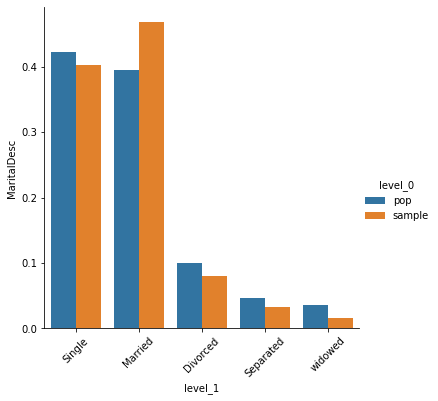

In [69]:
# MC
# Type your answer here.

compare_pop_sample(hr, hr_cluster_sample, "MaritalDesc")
plt.xticks(rotation='45')

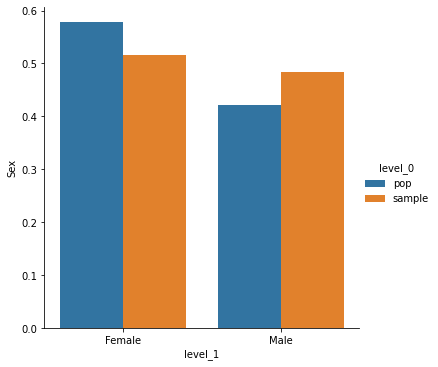

In [70]:
compare_pop_sample(hr, hr_cluster_sample, "Sex")

#### Systematic Sampling
Systematic sampling is carried out by randomly selecting an initial member of the population from the sampling frame and selecting additional members following a **pre-determined sequence**. This sequence is in the form of the index number for a member incremented/decremented by a fixed step size $h$. For example, if we start with the 5th member of the population and set a step size of $h = 2$, we will then select the 7th, 9th, 11th (so on and so forth) members of the population until we obtain a sample of desired size. Note that we can use modulo arithmetic to ensure that we don't overshoot the sample size when counting the indices.

<img src='../images/Syst_Sampling.png'>

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
Recall the previous example where we wanted to study the the job satisfaction of teachers in international schools in KL. To obtain a systematic sample, we index the list of teachers and pick an random number (e.g. 45) as our starting index. If we want to select 100 members with the step size being $h = 10$, then we select the 45th, 55th, 65th, ..., 445th members as our sample.
</div>

Systematic sampling is generally favored when the population is known to be large as it is easier to collect one large systematic sample than to draw multiple simple random samples. The conveniece however does come at the cost of bias if the data is ordered, e.g. picking 10 members from a set of 1,000 exam scores sorted in descending order will give a sample with a high average score if the step size is too small.

To deal with biases such as these, there is a variation of systematic sampling called *random systematic sampling*. This method is beyond the scope of this course as it requires in-depth knowledge of probability.

<div class = "alert alert-block alert-success">
<p>
<b>Pros</b>
<p>
1. Only requires one instance of random selection, the remaining members are selected using a pre-determined sequence.
<p>
2. Easy to carry out, even with a loosely-defined sampling frame.
<p>
<b>Cons</b>
<p>
1. May introduce bias if the sampling frame is arranged to begin with.
<p>
2. If sub-populations exist, the resulting sample may not be representative.
</div>

<div class = "alert alert-block alert-warning">
<p>
<b>Guided Exercise</b>
<p>
    Draw a systematic sample of size $n = 250$ from the <code>voter</code> data set with step size <code>175</code>. Assign this to the variable <code>mysample5</code> and examine the resulting sample using <code>head</code> and <code>describe</code>.
</div>

In [71]:
voter

,gender,ic,state_seat,polling_district,ethnicity,postcode
0,Male,661123-06-4031,3,44,Bumiputera,17750
1,Female,871217-06-8098,3,41,Bumiputera,17710
2,Male,761213-33-3923,2,29,Bumiputera,17500
3,Male,610407-33-9219,1,7,Bumiputera,17180
4,Male,600920-06-5171,2,23,Bumiputera,17440
...,...,...,...,...,...,...
51993,Male,870911-06-5849,2,22,Lain-lain,17430
51994,Male,911228-53-7615,3,40,Lain-lain,17710
51995,Female,631210-56-7762,3,39,Bumiputera,17690
51996,Male,910107-33-9815,1,20,Bumiputera,17300


In [72]:
np.random.seed(42)
start = np.random.choice(len(voter), 1)
h, n = 175, 250
index = start + h * (np.arange(n))

In [73]:
start

array([15795])

In [74]:
index

array([15795, 15970, 16145, 16320, 16495, 16670, 16845, 17020, 17195,
       17370, 17545, 17720, 17895, 18070, 18245, 18420, 18595, 18770,
       18945, 19120, 19295, 19470, 19645, 19820, 19995, 20170, 20345,
       20520, 20695, 20870, 21045, 21220, 21395, 21570, 21745, 21920,
       22095, 22270, 22445, 22620, 22795, 22970, 23145, 23320, 23495,
       23670, 23845, 24020, 24195, 24370, 24545, 24720, 24895, 25070,
       25245, 25420, 25595, 25770, 25945, 26120, 26295, 26470, 26645,
       26820, 26995, 27170, 27345, 27520, 27695, 27870, 28045, 28220,
       28395, 28570, 28745, 28920, 29095, 29270, 29445, 29620, 29795,
       29970, 30145, 30320, 30495, 30670, 30845, 31020, 31195, 31370,
       31545, 31720, 31895, 32070, 32245, 32420, 32595, 32770, 32945,
       33120, 33295, 33470, 33645, 33820, 33995, 34170, 34345, 34520,
       34695, 34870, 35045, 35220, 35395, 35570, 35745, 35920, 36095,
       36270, 36445, 36620, 36795, 36970, 37145, 37320, 37495, 37670,
       37845, 38020,

In [75]:
52020-51998

22

In [76]:
index % len(voter)

array([15795, 15970, 16145, 16320, 16495, 16670, 16845, 17020, 17195,
       17370, 17545, 17720, 17895, 18070, 18245, 18420, 18595, 18770,
       18945, 19120, 19295, 19470, 19645, 19820, 19995, 20170, 20345,
       20520, 20695, 20870, 21045, 21220, 21395, 21570, 21745, 21920,
       22095, 22270, 22445, 22620, 22795, 22970, 23145, 23320, 23495,
       23670, 23845, 24020, 24195, 24370, 24545, 24720, 24895, 25070,
       25245, 25420, 25595, 25770, 25945, 26120, 26295, 26470, 26645,
       26820, 26995, 27170, 27345, 27520, 27695, 27870, 28045, 28220,
       28395, 28570, 28745, 28920, 29095, 29270, 29445, 29620, 29795,
       29970, 30145, 30320, 30495, 30670, 30845, 31020, 31195, 31370,
       31545, 31720, 31895, 32070, 32245, 32420, 32595, 32770, 32945,
       33120, 33295, 33470, 33645, 33820, 33995, 34170, 34345, 34520,
       34695, 34870, 35045, 35220, 35395, 35570, 35745, 35920, 36095,
       36270, 36445, 36620, 36795, 36970, 37145, 37320, 37495, 37670,
       37845, 38020,

In [77]:
mysample5 = voter.iloc[index % len(voter),]

In [79]:
mysample5.tail()

,gender,ic,state_seat,polling_district,ethnicity,postcode
6672,Female,741212-32-2106,1,9,Bumiputera,17200
6847,Female,770830-32-7576,1,3,Bumiputera,17140
7022,Female,870824-33-5234,3,32,Bumiputera,17630
7197,Female,580421-06-3142,2,27,Bumiputera,17470
7372,Male,821026-32-8745,3,45,Bumiputera,17740


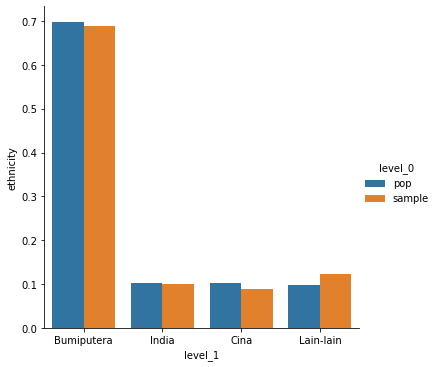

In [80]:
compare_pop_sample(voter, mysample5, "ethnicity")


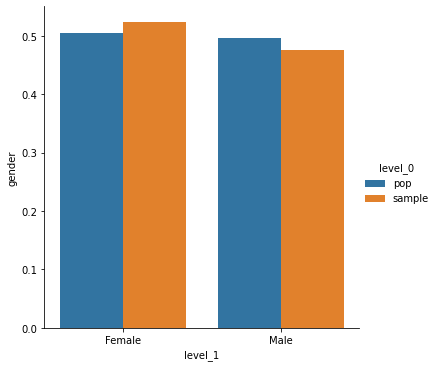

In [81]:
compare_pop_sample(voter, mysample5, "gender")


<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
    Draw a systematic sample of size $n = 50$ from the <code>hr</code> data set with step size <code>5</code>. Assign this to a variable of your choice and examine the resulting sample using <code>head</code> and <code>describe</code>.
</div>

In [82]:
# MC 
# Type your answer here.

np.random.seed(42)

start = np.random.choice(len(hr), 1)
h, n = 5, 50
index = start + h * (np.arange(n))
hr5 = hr.iloc[index % len(hr),]

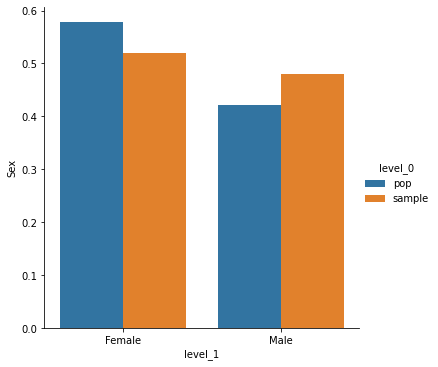

In [83]:
# MC
# Type your answer here.

compare_pop_sample(hr, hr5, "Sex")


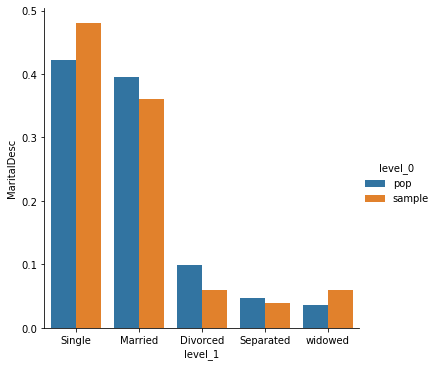

In [84]:
compare_pop_sample(hr, hr5, "MaritalDesc")


### Multistage Sampling
As the name suggests, multistage sampling is performed by **combining** two or more of the above sampling methodologies in **series**. The objective is to retain the strengths of each technique by leveraging the *order* in which we combine these techniques.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
Recall the previous example where we wanted to study the the job satisfaction of teachers in international schools in KL. Suppose we want to stratify our samples by gender of the teachers, but we would also like to conduct cluster sampling to reduce having to travel to all the different schools in KL. By combining both approaches, we can select a cluster of schools <i>then</i> pick stratified samples from each cluster.
</div>

As seen above, multistage sampling can introduce some complexity to the sampling process, but it does provide the best of both worlds of the combined methods when used appropriately. Ultimately, the decision to employ multistage sampling is subject to the researcher's scope of study.

<div class = "alert alert-block alert-success">
<p>
<b>Pros</b>
<p>
1. A well-selected combination of sampling techniques may yield a significantly better sample than the use of only one sampling technique.
<p>
2. Combinations such as cluster and stratified sampling result in well-represented samples that are cost-effective to collect.
<p>
<b>Cons</b>
<p>
1. Poor selection of sampling techniques to combine can compound bias.
<p>
2. Each additional stage introduces added complexity to the overall sampling process.
</div>

<div class = "alert alert-block alert-warning">
<p>
<b>Guided Exercise</b>
<p>
    Draw a multistage sample of size $n = 2000$ from the <code>voter</code> data set by selecting <code>2</code> random clusters from <code>state_seat</code> and stratifying each cluster by <code>ethnicity</code>. Assign this to the variable <code>mysample6</code> and examine the resulting sample using <code>head</code> and <code>describe</code>.
</div>

In [85]:
# stage 1: simple random sample of clusters
np.random.seed(42)
clusters = np.random.choice(voter.state_seat.unique(), size = 2)
voter_stage1 = voter[voter.state_seat.isin(clusters)]
f=2000/voter_stage1.shape[0]

# stage 2: stratified sampling 
voter_2stage = voter_stage1.groupby('ethnicity').\
apply(lambda x: x.sample(frac = f,random_state = 42, replace=False))

In [86]:
clusters

array(['1', '3'], dtype=object)

In [87]:
f

0.05713959202331295

In [88]:
voter_2stage

gender              ic state_seat polling_district  \
ethnicity                                                              
Bumiputera 45206  Female  401206-33-5362          3               43   
           15396  Female  670607-06-1506          1               17   
           4776     Male  731106-32-4745          3               37   
           44645    Male  900909-37-4079          3               46   
           40056  Female  480705-06-8142          1                5   
...                  ...             ...        ...              ...   
Lain-lain  26588  Female  740919-33-6026          3               42   
           8261   Female  850807-06-5484          1               18   
           38355    Male  710103-33-7303          3               36   
           32006    Male  740606-32-9977          1               18   
           29988  Female  920211-32-1204          1               11   

                   ethnicity postcode  
ethnicity                              
Bumiputera 45206  Bumiputera    17740  
           15396  Bumiputera    17270  
           4776   Bumiputera    17670  
           44645  Bumiputera    17760  
           40056  Bumiputera    17150  
...                      ...      ...  
Lain-lain  26588   Lain-lain    17710  
           8261    Lain-lain    17280  
           38355   Lain-lain    17670  
           32006   Lain-lain    17290  
           29988   Lain-lain    17210  

[2000 rows x 6 columns]

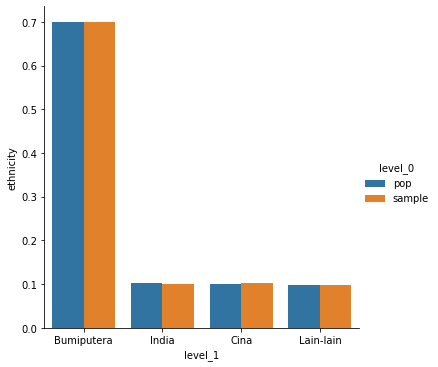

In [89]:
compare_pop_sample(voter,voter_2stage,  'ethnicity')

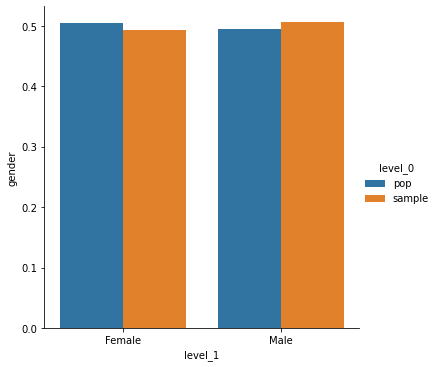

In [90]:
compare_pop_sample(voter, voter_2stage, 'gender')

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
Draw a multistage sample of size $n=20$ from the <code>hr</code> data set by selecting <code>2</code> random clusters each from <code>EmployeeSource</code> and stratifying each cluster by <code>Department</code>. Assign this to a variable of your choice and examine the resulting sample using <code>head</code> and <code>describe</code>.
</div>

In [91]:
hr['EmployeeSource'].unique()

array(['Diversity Job Fair', 'Website Banner Ads', 'Internet Search',
       'Pay Per Click - Google', 'Monster.com', 'Other',
       'Employee Referral', 'Search Engine - Google Bing Yahoo',
       'Glassdoor', 'Vendor Referral', 'Professional Society',
       'Information Session', 'Company Intranet - Partner',
       'On-campus Recruiting', 'Billboard', 'MBTA ads', 'Word of Mouth',
       'Social Networks - Facebook Twitter etc',
       'On-line Web application', 'Newspager/Magazine', 'Pay Per Click',
       'Careerbuilder'], dtype=object)

In [92]:
# MC 
# Type your answer here.

np.random.seed(42)
clusters = np.random.choice(hr['EmployeeSource'].unique(), size = 2)
hr_stage1 = hr[hr['EmployeeSource'].isin(clusters)]
hr_2stage = hr_stage1.groupby("Department").\
apply(lambda x: x.sample(frac = 20/len(hr_stage1)))

In [93]:
clusters

array(['Employee Referral', 'Newspager/Magazine'], dtype=object)

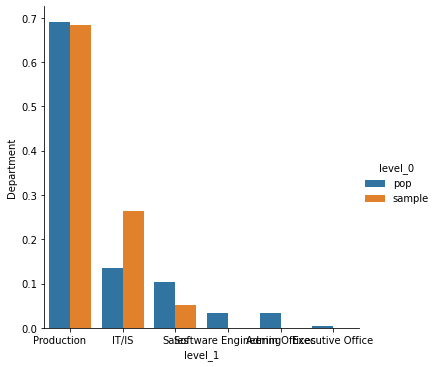

In [94]:
compare_pop_sample(hr,hr_2stage, 'Department' )

## Non-probabilistic Sampling <a name="noprob"></a>
Non-probabilistic sampling is a sampling technique in which the likelihood of a member of a population being selected for a sample is not entirely up to chance. Though easier to execute, we generally avoid non-probabilistic sampling as it yields significant **bias** compared to probabilistic methods. More often than not, non-probabilstic sampling involves sample selections that are based on the researcher's **subjective judgement**. The following sampling techniques fall under the umbrella of non-probabilistic sampling:
1. Convenience sampling
2. Volunteer sampling

There are other types of non-probabilistic sampling (*purposive*, *quota*, etc.), but we will focus on the above two as they are the most commonly used ones. We will aslo skip the pros and cons of these techniques as they are mostly negative, i.e. yield significant bias and should be avoided as far as possible.

### Convenience Sampling
As the name suggests, convenience sampling is the selection of members from a population based on the researcher's **ease of access** to members of the population. The following are examples of convenience sampling:
1. A company decides to poll the first 100 customers who send them an email inquiring about their services.
2. A marketing firm conducts a survey at a shopping mall nearby their home office.

In both of the above cases, no care is given to *why* a specific person was polled/surveyed other than the fact that they were easy to contact. It goes without saying that such sampling practices will undoubtedly misrepresent the population being studied.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
A company decides to poll the first 100 customers who send them an email inquiring about their services.
A marketing firm conducts a survey at a shopping mall nearby their home office.
</div>

### Volunteer Sampling
Volunteer sampling is sampling in which the participants are all **willing volunteers**. This technique can yield significant bias because the sample is *chosen by the volunteers*, not the researcher. Volunteers often have a vested interest in the discussion/topic of study and are keen to share their point of view (this isn't always a good thing).

Here we see that the nature of the bias introduced differs from that of a convenience sample - the respondents here are already 'part of the system' being studied and we can expect their opinions to be skewed in favor of the researcher.

<div class = "alert alert-block alert-info">
<p>
<b>Example</b>
<p>
1. During a show, a television station encourages their viewers to participate in an online poll on their Facebook page.
<p>
2. A band polls its fans on how they rate the band at a meet and greet event.
</div>

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
A researcher wishes to investigate the movie preferences of all students at a university. Listed below are various ways in which he can do this. Identify the sampling method associated with each option.
<p>
1. He stands outside the library and asks students passing by questions on their movie preferences.
<p>
2. He obtains a student directory for the university and emails a questionnaire to 200 randomly selected students.
<p>
3. He obtains a student directory for the university and emails a questionnaire to every 15th name on the list.
<p>
4. He obtains a student directory and emails a questionnaire to 20% of the students from each department.
<p>
5. He obtains a student directory and emails a questionnaire to all students from the Engineering and Humanities departments.
<p>
6. He obtains a student directory and emails a questionnaire to 25% of the students from the Engineering and Business departments.
</div>

## Summary
To summarize:
1. Sampling is the process of selecting a subset of the population. It is usually undertaken due to infeasibility of collecting data from the entire population.
2. There are various sampling methodologies, each with their own strengths/weaknesses. These methodologies can be combined to yield better results, but at the cost of complexity.
3. Sampling should always take the researcher's objectives into consideration. Assumptions about the impact of attributes should be noted upfront.

The chart below gives an overview of how we should approach the sampling process. Take care, and have fun sampling!

![](../images/considerations.png)

<div class = "alert alert-block alert-danger">
<p>
<b>Exercise</b>
<p>
With reference to our motivational example, draw an appropriate sample from the <code>voter</code> data set for the analyst to work on. You may take the following information into account:
<p>
1. Candidate A is a mother of 3, whereas candidate B is a bachelor.
<p>
2. Both candidates stay in the same housing estate.
<p>
3. The analyst's budget allows for a maximum sample size of 10,000 only.
</div>

In [ ]:
# MC
# Type your answer here.

voter.head()

In [ ]:
# MC
# Type your answer here.

voter_sample = voter.groupby(['gender', 'ethnicity', 'state_seat']).\
apply(lambda x: x.sample(frac = 10000/voter.shape[0], replace = False))

In [ ]:
# MC
# Type your answer here.

pd.crosstab(voter.loc[:, "state_seat"], 
            voter.loc[:, "gender"]).round(1)

In [ ]:
# MC
# Type your answer here.

pd.crosstab(voter.loc[:, "state_seat"], 
            voter.loc[:, "gender"],
            normalize = "index").round(1)

# 3. The Effect of Sample Size on Bias <a name="effect"></a>
Now that we are familiar with the various techniques involved in selecting samples, let us now discuss the impact of varying sample sizes on the accuracy of estimating our population. The code below simulates a population of $n=1000$ members and draws samples of increasing sizes to compute the relative difference between the sample and population means.

In [96]:
np.random.seed(42)

N = 1000
mypop = np.random.choice(100, N, replace = True) + 1
popmean, popsd = np.mean(mypop), np.std(mypop, ddof = 1)
popmean, popsd

(50.128, 29.573505172843618)

In [97]:
relative_error = [abs(np.mean(np.random.choice(mypop, i)) - popmean)/popmean for i in range(N)]

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


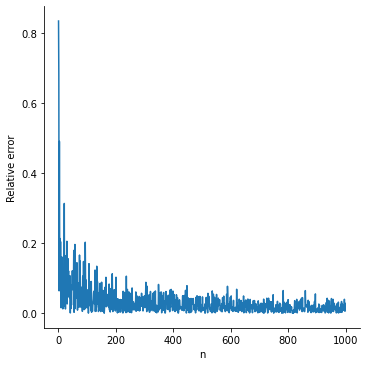

In [99]:
rerror = pd.DataFrame({"n": np.arange(N), 
                       "Relative error": relative_error})

sns.relplot(x = "n", y = "Relative error", kind = "line", data = rerror);

As we can see from the graph, there is a clear trend for the relative difference to decrease as the sample size increases. In other words, the larger the sample size used, the better our estimates of the population will be.

In practice, the calculation of an optimal sample size is done using a technique called **power analysis** which is beyond the scope of this course. We can however take a quick glance at computing the minimum sample size using our motivational example.

# Extra

## Determining the Minimum Number of Voters to Sample <a name="power"></a>
To compute the minimum sample size using power analysis, we need to have 4 pieces of information:

<div class = "alert alert-block alert-success">
<p>
1. <b>The type of statistical test we would like to run</b>
<p>
There are different types of statistical tests (t, chi-square, etc). Some tests are more complex and require larger samples to run effectively.
<p>
2. <b>Effect size</b>
<p>
The effect size is a measure of how small/large a change we wish to be able to detect when using a statistical test. Larger effects are easier to detect as opposed to smaller ones, and this is reflected in the minimum sample size required. A larger effect size will require a smaller sample, whereas a smaller
effect size requires a larger sample.
<p>
3. <b>Significance level</b>
<p>
The significance level is a value between 0 and 1 that represents how likely we are to accidentally detect an effect that <i>isn't actually</i> present in our data.
<p>
4. <b>Power</b>
<p>
Power is a value between 0 and 1 that represents how likely we are to detect an effect that is <i>actually</i> present in our data.
</div>

In Python, power analysis can be run using the `statsmodels` package. Alternatively, there are free tools available online such as *GPower* that can also be used to compute the required sample size. For the purpose of our motivational example, we will use the following parameters:

<div class = "alert alert-block alert-warning">
<p>
1. <b>The type of statistical test we would like to run</b>
<p>
&nbsp; &nbsp; We will use a proportion test, <code>p.test</code>, to determine if either candidate garners more support than the other.
<p>
2. <b>Effect size</b>
<p>
&nbsp; &nbsp; We will select an effect size of <code>h = 0.05</code>, i.e. we will only be able to detect differences of at least 0.05 in the proportion. Any differences smaller than
<p>
&nbsp; &nbsp; this will go unnoticed.
<p>
3. <b>Significance level</b>
<p>
&nbsp; &nbsp; We will select a significance level of <code>alpha = 0.05</code>. This means that we are only likely to accidentally detect a non-existent effect 5% of the
<p>
&nbsp; &nbsp; time.
<p>
4. <b>Power</b>
<p>
&nbsp; &nbsp; We will select a power of <code>power = 0.8</code>. This means that we will successfully detect an effect that is present in our data 80% of the time.
</div>

For the sake of brevity, we'll skip any discussion on the details of the above, including why the values given are appropriate and skip directly to the computation:

In [ ]:
import statsmodels.stats.power as smp
smp.NormalIndPower().solve_power(effect_size = 0.05, power=0.8, alpha=0.05, ratio=0)
# If ratio=0, then effect_size is the standardized mean in the one sample test.

As we can see, the analyst would require a sample of at least 3140 voters to make a meaningful conclusion. Altering any of the 4 parameters (test type, effect size, significance level, power) will change the minimum sample size required to make a meaningful estimate of the population.